In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [13]:
import matplotlib.pyplot as plt
digits = datasets.load_digits()
pd = datasets.load_digits()
print('Digits dictionary content \n{}'.format(digits.keys()))


Digits dictionary content 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


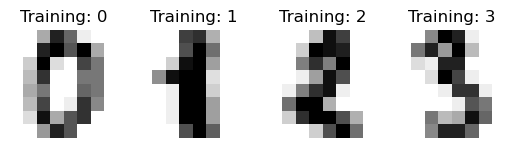

In [14]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.25)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)


### Tree

In [17]:
from sklearn import tree
class_tree=tree.DecisionTreeClassifier()
class_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = class_tree.predict(X_test)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 86.666667%


### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression


class_logistic = LogisticRegression()
class_logistic.fit(X_train, y_train)

y_pred = class_logistic.predict(X_test)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 96.444444%


C:\Users\Pierre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Neural Network

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#input data normalization
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
mlp = MLPClassifier()  #default
# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)
y_pred = mlp.predict(X_test_scaled)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 98.000000%


### Multinomial naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
 
classifier_naive = MultinomialNB()
classifier_naive.fit(X_train, y_train)
y_pred  = classifier_naive.predict(X_test)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 90.444444%


### K-nearest neighbors

In [25]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred  = knn.predict(X_test)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 98.444444%


###  Support Vector Machine 

In [29]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)  # as is in https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
#fit to the training data
svm_classifier.fit(X_train,y_train)
y_pred = svm_classifier.predict(X_test)

print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 99.111111%


### Metrics

In [30]:
from sklearn.metrics import  classification_report
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (svm_classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        49
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        51
           5       1.00      0.96      0.98        45
           6       0.98      1.00      0.99        49
           7       0.95      1.00      0.97        39
           8       1.00      1.00      1.00        43
           9       0.97      0.97      0.97        32

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450




Confusion matrix, without normalization
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  1  0  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 43  1  0  0  1]
 [ 0  0  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0  1  0 31]]


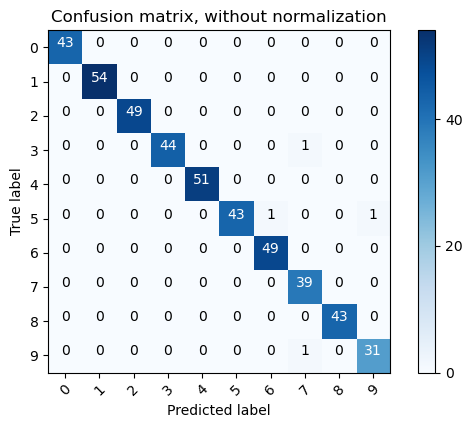

In [31]:
from sklearn.metrics import confusion_matrix
import itertools
#function to plot the Confusion Matrix using matplotlib
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams['figure.figsize'] = (12,8) # set the plot size
    plt.rcParams['font.size']= (24)
    plt.tight_layout()
    
target_names=digits.target_names 
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
plt.show()                 